<a href="https://colab.research.google.com/github/Harshavalmiki/SJSU-Data-Mining-255/blob/main/Document_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA




In [6]:
# Step 1: Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data

# Step 2: Preprocess and vectorize the documents using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2)
X = vectorizer.fit_transform(documents)

# Step 3: Perform KMeans clustering
true_k = 10  # Number of clusters
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)


KMeans(max_iter=100, n_clusters=10, n_init=1)

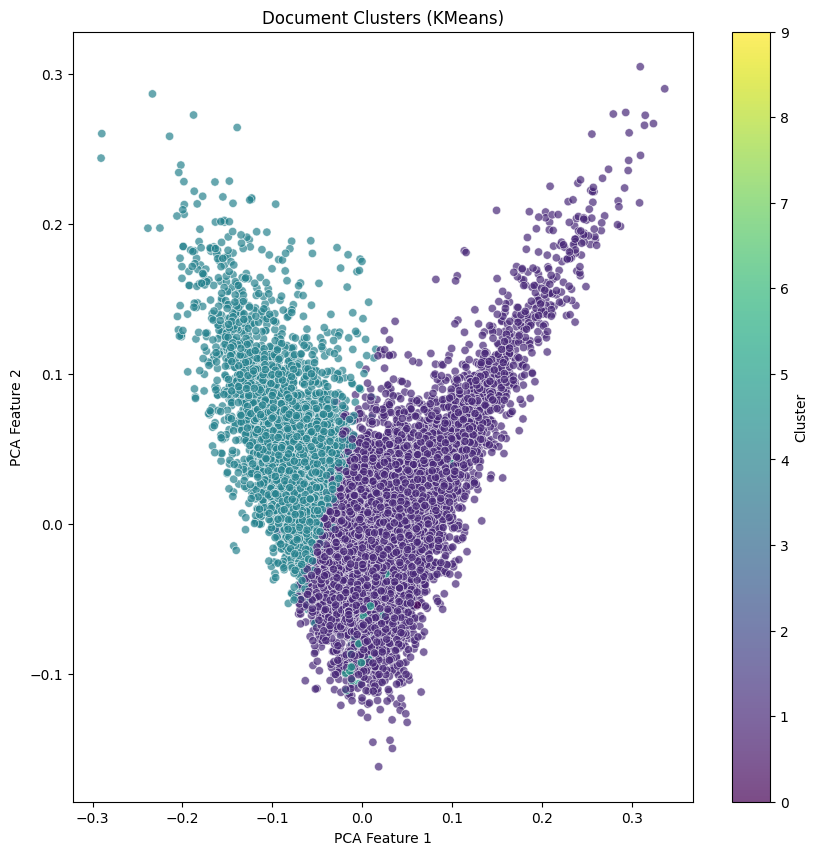

In [7]:
# Step 4: Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Step 5: Visualize the document clusters
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model.labels_, cmap='viridis', alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title('Document Clusters (KMeans)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [8]:



# Output information about the clusters
for cluster_num in range(true_k):
    cluster_samples = np.where(model.labels_ == cluster_num)[0]
    print(f"\nCluster {cluster_num + 1} Samples:")
    for i, sample_idx in enumerate(cluster_samples[:5]):  # Display the first 5 samples in each cluster
        print(f"{i + 1}. {newsgroups.target_names[newsgroups.target[sample_idx]]}:")
        print(f"   {documents[sample_idx][:200]}...\n")


Cluster 1 Samples:
1. rec.sport.baseball:
   

     Would you say the same thing about the Dodgers in '65 or '66?  True,
Cone is probably as good as Drysdale, and they have no Koufax, but still,
these teams were winning with home run leaders who...


Cluster 2 Samples:
1. rec.sport.hockey:
   

I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However,...

2. talk.politics.mideast:
   



	Finally you said what you dream about. Mediterranean???? That was new....
	The area will be "greater" after some years, like your "holocaust" numbers......




		*****
	Is't July in USA now????? ...

3. sci.electronics:
   

Back in high school I worked as a lab assistant for a bunch of experimental
psychologists at Bell Labs.  When they were doing visual perception and
memory experiments, they used vector-type displays...

4. comp.sys.mac.hardware:
   

AE is i